## Preparing data to work on models (Encoding):

In [1]:
import pandas as pd

df = pd.read_csv('Primary_Dataset.csv')

for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")
    print("Unique Values:")
    print(df[column].unique()) 
    print("-" * 50)  


Column Name: the age:
Data Type: object
Unique Values:
['13-17' '18-24' '35-44' '25-34' '45-54' '55 and more']
--------------------------------------------------
Column Name: Gender:
Data Type: object
Unique Values:
['Female' 'male']
--------------------------------------------------
Column Name: Area:
Data Type: object
Unique Values:
['Riyadh' 'Dammam' 'Al-Baha' 'Mecca' 'Tabuk' 'Jeddah' 'Al-Ahsa' 'Medina'
 'Abha' 'Hail' 'Al Khobar' 'Jazan' 'Buraidah' 'Jubail' 'Khamis Mushayt'
 'Sakaka' 'Najran' 'Dhahran' 'Unayzah' 'Hafar Al-Batin']
--------------------------------------------------
Column Name: Current educational level:
Data Type: object
Unique Values:
['High school or equivalent' "Bachelor's degree" "Master's" 'diploma'
 'Less than high school' 'Ph.D' 'student']
--------------------------------------------------
Column Name: marital status:
Data Type: object
Unique Values:
['bachelor' 'married' 'absolute' 'A widower']
--------------------------------------------------
Column Name: E

In [28]:
df.shape

(839, 20)

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Columns to drop
columns_to_drop = [
    'Do you use social media applications?',
    'What social media platforms do you use?'
]

# Columns to be encoded using One-Hot Encoding
columns_to_one_hot = [
    'the age:',
    'Area:',
    'Current educational level:',
    'marital status:',
    'Employment status:',
    'What app do you use the most?',
    'How many hours do you spend on social media platforms daily?'
]

# Column to be encoded using Label Encoding
column_to_label_encode = 'Gender:'

# Create a new copy of the DataFrame to work on
encoded_df = df.copy()

# Remove the specified columns
encoded_df.drop(columns=columns_to_drop, inplace=True)

# Dictionary to store mappings for all encoded columns
mappings = {}

# Apply Label Encoding to the "Gender" column
label_encoder = LabelEncoder()
encoded_df[column_to_label_encode] = label_encoder.fit_transform(encoded_df[column_to_label_encode])
# Store mappings for "Gender"
mappings[column_to_label_encode] = {index: label for index, label in enumerate(label_encoder.classes_)}

# Apply One-Hot Encoding to the specified columns
one_hot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False ensures the output is a dense array
encoded_columns = one_hot_encoder.fit_transform(encoded_df[columns_to_one_hot])

# Convert the encoded columns to integers
encoded_columns = encoded_columns.astype(int)

# Create a DataFrame for the encoded columns
one_hot_encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot))

# Store mappings for One-Hot Encoded columns
for i, column in enumerate(columns_to_one_hot):
    mappings[column] = list(encoded_df[column].unique())

# Drop the original columns that were One-Hot Encoded and add the new encoded columns
encoded_df.drop(columns=columns_to_one_hot, inplace=True)
encoded_df = pd.concat([encoded_df, one_hot_encoded_df], axis=1)

# Save or display the updated DataFrame
encoded_df.to_csv("EncodedPrimaryData.csv", index=False)  # Saves to a CSV file
print("Encoded DataFrame saved to 'encoded_PrimaryData.csv'.")

# Print all mappings for encoded columns
print("\nMappings for all encoded columns:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")


Encoded DataFrame saved to 'encoded_PrimaryData.csv'.

Mappings for all encoded columns:
Gender:: {0: 'Female', 1: 'male'}
the age:: ['13-17', '18-24', '35-44', '25-34', '45-54', '55 and more']
Area:: ['Riyadh', 'Dammam', 'Al-Baha', 'Mecca', 'Tabuk', 'Jeddah', 'Al-Ahsa', 'Medina', 'Abha', 'Hail', 'Al Khobar', 'Jazan', 'Buraidah', 'Jubail', 'Khamis Mushayt', 'Sakaka', 'Najran', 'Dhahran', 'Unayzah', 'Hafar Al-Batin']
Current educational level:: ['High school or equivalent', "Bachelor's degree", "Master's", 'diploma', 'Less than high school', 'Ph.D', 'student']
marital status:: ['bachelor', 'married', 'absolute', 'A widower']
Employment status:: ['student', 'Not employed', 'Housewife, unemployed', 'Full time employee', 'Student, unemployed', 'housewife', 'retired', 'Student, housewife', 'Part-time employee', 'Student, full-time employee', 'Student, part-time employee', 'A worker with his own work', 'Part-time employee, full-time employee', 'Student, housewife, unemployed', 'Full time emp

In [3]:
encoded_df.head()

,Gender:,Do you feel anxious or stressed after reading negative comments on your posts?,Are you worried about missing out on important information or events when you're not using social media?,Do you feel that using social media has affected your ability to focus and accomplish daily tasks?,Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?,Do you use social media right before going to sleep?,Do you have difficulty sleeping because of thinking about what you saw on social media platforms?,Does the number of likes or comments you get on your posts affect you?,Have you changed your opinion or feeling based on the reactions of others on social media platforms?,Do you prefer interacting with friends or family online rather than face-to-face?,...,What app do you use the most?_WhatsApp,What app do you use the most?_X (Twitter),What app do you use the most?_Youtube,How many hours do you spend on social media platforms daily?_'1-2,How many hours do you spend on social media platforms daily?_'12 hours or more,How many hours do you spend on social media platforms daily?_'3-4,How many hours do you spend on social media platforms daily?_'5-6,How many hours do you spend on social media platforms daily?_'7-8,How many hours do you spend on social media platforms daily?_'9-10,How many hours do you spend on social media platforms daily?_'Less than an hour
0,0,3,4,1,1,1,4,5,3,1,...,0,0,0,0,1,0,0,0,0,0
1,1,4,4,2,3,2,4,4,4,4,...,0,1,0,0,0,1,0,0,0,0
2,0,1,1,1,1,1,1,1,1,2,...,1,0,0,0,0,0,0,0,1,0
3,0,2,1,2,4,2,4,4,1,2,...,1,0,0,0,0,0,1,0,0,0
4,0,4,2,1,2,1,3,4,4,4,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# Print the data type of each column in the DataFrame
print("Column Data Types:")
print(encoded_df.dtypes)


Column Data Types:
Gender:                                                                                                                                                                int64
Do you feel anxious or stressed after reading negative comments on your posts?                                                                                         int64
Are you worried about missing out on important information or events when you're not using social media?                                                               int64
Do you feel that using social media has affected your ability to focus and accomplish daily tasks?                                                                     int64
Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?    int64
                                                                                                                    

## Working on models

### 1.loading libraries and dataset

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_path = "EncodedPrimaryData.csv"
data = pd.read_csv(data_path)

### 2. Apply Z-Score normalization to specific columns

In [30]:
columns_to_normalize = [
    "Does the number of likes or comments you get on your posts affect you?",
    "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
    "Do you prefer interacting with friends or family online rather than face-to-face?",
    "Do you feel anxious or stressed after reading negative comments on your posts?",
    "Are you worried about missing out on important information or events when you're not using social media?",
    "Do you use social media right before going to sleep?",
    "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?",
    "How often do you find yourself using social media for longer than you planned?",
    "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
    "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
]

scaler = StandardScaler()
ScalerData=data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
print(ScalerData)

[[ 1.03492293  0.16796465 -1.75425442 ...  0.31159357 -0.88621155
  -0.96572655]
 [ 0.36545467  1.21962388  1.14493033 ...  0.31159357  0.13512292
   0.87993307]
 [-1.64295012 -1.93535382 -0.7878595  ... -1.00874484 -0.88621155
  -0.96572655]
 ...
 [-1.64295012 -0.88369459  0.17853541 ... -1.00874484 -0.88621155
  -0.96572655]
 [-0.97348186  0.16796465  1.14493033 ... -1.00874484  2.17779185
  -0.96572655]
 [-0.3040136  -0.88369459  1.14493033 ... -1.00874484 -0.88621155
  -0.96572655]]


In [31]:

print(data[columns_to_normalize].describe())


       Does the number of likes or comments you get on your posts affect you?  \
count                                       8.390000e+02                        
mean                                       -1.100960e-16                        
std                                         1.000596e+00                        
min                                        -1.642950e+00                        
25%                                        -9.734819e-01                        
50%                                         3.654547e-01                        
75%                                         1.034923e+00                        
max                                         1.034923e+00                        

       Have you changed your opinion or feeling based on the reactions of others on social media platforms?  \
count                                       8.390000e+02                                                      
mean                                        9.31

The dependent data (Does the number of likes or comments..., etc.) came from survey questions with values ranging from 1 to 5.<br>
To ensure uniform scaling and to remove bias from varying ranges, Z-Score Normalization was applied.<br>
Z-Score standardizes the data such that:<br>
Mean = 0<br>
Standard Deviation = 1<br>
This makes the data more suitable for regression models,<br> especially linear regression.<br>

The StandardScaler from sklearn was used to transform the dependent data into Z-Scores.<br>
Columns normalized include self-esteem-related questions,<br>
social anxiety, insomnia, FOMO, and attention span.<br>

### 2. HMI calculation

### Mental Health Index (MHI) Weights Distribution with Brain Functions and Cognitive Processes

We have connected the weights of the MHI components to brain functions and cognitive processes, emphasizing the neural mechanisms to better classify the importance of each factor.

---

| **Factor**                | **Weight** | **Brain Regions**                                                                                          | **Cognitive Processes**                                                                                                                | **Impact on Mental Health**                                      | **Associated Questions**                                                                                                                                                                                                                                                                                                     |
|---------------------------|------------|----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Self-Esteem**           | **35%**    | **Prefrontal Cortex (PFC)**: Self-evaluation, decision-making.                                           | Self-reflection: Reduced self-esteem affects positive reinforcement. Emotional regulation: Low self-esteem leads to emotional challenges. | High self-esteem protects against anxiety and depression.        | - "Does the number of likes or comments you get on your posts affect you?"  <br> - "Have you changed your opinion or feeling based on the reactions of others on social media platforms?"  <br> - "Do you prefer interacting with friends or family online rather than face-to-face?"                                                                        |
|                           |            | **Cingulate Cortex**: Emotion regulation, self-awareness.                                                |                                                                                                                                         | Studies link low self-esteem to withdrawal and emotional issues. |                                                                                                                                                                                                                                                                                                                             |
| **Social Anxiety**         | **25%**    | **Amygdala**: Detects social threats, increases fear.                                                    | Emotional response regulation: Amplifies avoidance behaviors. Memory and focus: Reduces focus in social situations.                     | Increases stress, isolation, and risks of depression.            | - "Do you feel anxious or stressed after reading negative comments on your posts?"  <br> - "Are you worried about missing out on important information or events when you're not using social media?"                                                                                                                                                        |
|                           |            | **Insular Cortex**: Awareness of self and social anxiety.                                                |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Insomnia**               | **20%**    | **Hypothalamus**: Regulates sleep-wake cycles.                                                           | Focus and decision-making: Sleep deprivation reduces cognitive efficiency. Emotional regulation: Worsens emotional instability.         | Chronic insomnia is linked to anxiety, depression, and memory issues. | - "Do you use social media right before going to sleep?"  <br> - "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"                                                                                                                                                                              |
|                           |            | **Hippocampus**: Impacts emotional memory during sleep deprivation.                                       |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Fear of Missing Out (FOMO)** | **15%**    | **Nucleus Accumbens**: Activates reward systems from social media updates.                              | Addictive behavior: FOMO leads to compulsive habits. Social comparison: Chronic exposure to idealized content increases stress.         | Contributes to anxiety and stress but with moderate effects.     | - "How often do you find yourself using social media for longer than you planned?"                                                                                                                                                                                                                                                                                  |
|                           |            | **Anterior Cingulate Cortex (ACC)**: Processes feelings of exclusion or missing out.                     |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Shorter Attention Span** | **5%**     | **Prefrontal Cortex (PFC)**: Essential for sustained attention.                                          | Sustained attention: Shortened attention spans lower productivity. Multitasking: Frequent content shifts weaken focus.                  | Indirect impact, contributes to frustration and life dissatisfaction. | - "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?"  <br> - "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"                                                                                  |
|                           |            | **Default Mode Network (DMN)**: Disrupted by frequent interruptions.                                    |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             
---

### Explanation of Distribution

- **Self-Esteem (35%)**: Assigned the highest weight because it involves the Prefrontal and Cingulate Cortex, critical for long-term mental health resilience.
- **Social Anxiety (25%)**: Weighted as the second most important factor due to its association with the Amygdala and Insular Cortex, which are directly tied to fear and anxiety responses.
- **Insomnia (20%)**: Sleep regulation by the Hypothalamus and memory processing by the Hippocampus make it a vital contributor to mental health.
- **FOMO (15%)**: The reward systems driven by the Nucleus Accumbens and exclusion feelings processed by the ACC justify a moderate weight.
- **Shorter Attention Span (5%)**: While impactful on productivity, its direct impact on mental health is lesser, leading to a lower weight.

In [32]:

# 3. Compute individual indices based on grouped questions
columns_mapping = {
    "Self-Esteem": [
        "Does the number of likes or comments you get on your posts affect you?",
        "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
        "Do you prefer interacting with friends or family online rather than face-to-face?"
    ],
    "Social Anxiety": [
        "Do you feel anxious or stressed after reading negative comments on your posts?",
        "Are you worried about missing out on important information or events when you're not using social media?"
    ],
    "Insomnia": [
        "Do you use social media right before going to sleep?",
        "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"
    ],
    "FOMO": [
        "How often do you find yourself using social media for longer than you planned?"
    ],
    "Attention Span": [
        "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
        "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
    ]
}

weights = {"Self-Esteem": 0.35, "Social Anxiety": 0.25, "Insomnia": 0.20, "FOMO": 0.15, "Attention Span": 0.05}

# Calculate individual indices
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

# Compute the Mental Health Index (MHI)
data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)


### 4. Specify independent variables (features)

In [33]:
independent_columns = [
    "Gender:", 
    "the age:_13-17", "the age:_18-24", "the age:_25-34", "the age:_35-44", "the age:_45-54", "the age:_55 and more",
    "Area:_Abha", "Area:_Al Khobar", "Area:_Al-Ahsa", "Area:_Al-Baha", "Area:_Buraidah", "Area:_Dammam", "Area:_Dhahran",
    "Area:_Hafar Al-Batin", "Area:_Hail", "Area:_Jazan", "Area:_Jeddah", "Area:_Jubail", "Area:_Khamis Mushayt",
    "Area:_Mecca", "Area:_Medina", "Area:_Najran", "Area:_Riyadh", "Area:_Sakaka", "Area:_Tabuk", "Area:_Unayzah",
    "Current educational level:_Bachelor's degree", "Current educational level:_High school or equivalent",
    "Current educational level:_Less than high school", "Current educational level:_Master's", 
    "Current educational level:_Ph.D", "Current educational level:_diploma", "Current educational level:_student",
    "marital status:_A widower", "marital status:_absolute", "marital status:_bachelor", "marital status:_married",
    "Employment status:_A worker with his own work", "Employment status:_Full time employee",
    "Employment status:_Not employed", "Employment status:_Part-time employee",
    "Employment status:_Student, full-time employee", "Employment status:_student",
    "What app do you use the most?_Facebook", "What app do you use the most?_Instagram",
    "What app do you use the most?_LinkedIn", "What app do you use the most?_Netflix",
    "What app do you use the most?_Snapchat", "What app do you use the most?_Telegram",
    "What app do you use the most?_TikTok", "What app do you use the most?_WhatsApp",
    "What app do you use the most?_Youtube",
    "How many hours do you spend on social media platforms daily?_'1-2",
    "How many hours do you spend on social media platforms daily?_'3-4",
    "How many hours do you spend on social media platforms daily?_'5-6",
    "How many hours do you spend on social media platforms daily?_'7-8",
    "How many hours do you spend on social media platforms daily?_'9-10",
    "How many hours do you spend on social media platforms daily?_'12 hours or more"
]

### 5. Remove one category from each group to avoid multicollinearity

In [34]:
independent_columns.remove("the age:_55 and more")  # Age group
independent_columns.remove("Area:_Unayzah")        # Area group
independent_columns.remove("Current educational level:_Ph.D")  # Education level
independent_columns.remove("marital status:_married")  # Marital status
independent_columns.remove("Employment status:_Not employed")  # Employment status
independent_columns.remove("What app do you use the most?_Facebook")  # Most-used app
independent_columns.remove("How many hours do you spend on social media platforms daily?_'12 hours or more")  # Social media hours

### 6. Prepare independent and dependent variables

In [35]:
independent_data = data[independent_columns]
dependent_data = data["Mental Health Index (MHI)"]

### 7. Split data into training and testing sets

In [36]:
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

### 5. Null Model

In [38]:
# 7. Null Model
null_model_predictions = np.full_like(y_test, y_train.mean())
mse_null = mean_squared_error(y_test, null_model_predictions)  # MSE
mae_null = mean_absolute_error(y_test, null_model_predictions)  # MAE
rmse_null = np.sqrt(mse_null)  # RMSE
r2_null = r2_score(y_test, null_model_predictions)  # R² Score

print("Null Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_null:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_null:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_null:.4f}")
print(f"  R² Score: {r2_null:.4f}")
print("-" * 40)


Null Model Performance:
  Mean Squared Error (MSE): 0.3554
  Mean Absolute Error (MAE): 0.4900
  Root Mean Squared Error (RMSE): 0.5961
  R² Score: -0.0094
----------------------------------------


### 6. Baseline Model (Linear Regression)


In [39]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Baseline Model (Linear Regression) Performance:")
print(f"  Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"  R² Score: {r2_linear:.4f}")
print("-" * 40)

Baseline Model (Linear Regression) Performance:
  Mean Squared Error (MSE): 0.3626
  Mean Absolute Error (MAE): 0.4900
  Root Mean Squared Error (RMSE): 0.6022
  R² Score: -0.0300
----------------------------------------


### **Analysis and Comparison of Null Model and Baseline Model (Linear Regression)**

#### **1. Null Model Performance**:
- **MSE = 0.3554**: The Null Model, which predicts the mean value for all cases, has a relatively high Mean Squared Error (MSE) of 0.3554. This is considered a poor performance compared to more sophisticated models.
- **MAE = 0.4900**: The Mean Absolute Error (MAE) is 0.4900, indicating that the average error in predictions is 0.4900.
- **RMSE = 0.5961**: The Root Mean Squared Error (RMSE) is 0.5961, reflecting the model's average error in predicting the values.
- **R² = -0.0094**: A negative R² value means the Null Model performs worse than simply predicting the mean of the data. This is expected, as the Null Model does not use any features to make predictions.

#### **2. Baseline Model (Linear Regression) Performance**:
- **MSE = 0.3626**: The MSE for the Linear Regression model is slightly higher than that of the Null Model (0.3626 vs. 0.3554).
- **MAE = 0.4900**: The MAE is exactly the same as the Null Model (0.4900).
- **RMSE = 0.6022**: The RMSE is also slightly higher in the Linear Regression model compared to the Null Model (0.6022 vs. 0.5961).
- **R² = -0.0300**: The R² value is negative, indicating that the Linear Regression model does not improve predictions over the Null Model. A negative R² shows that the model is performing worse than predicting the mean.

- **Interpretation**:
   - Despite **Linear Regression** being a simple machine learning algorithm that considers linear relationships between features, the **Null Model** (which just predicts the mean) might be more accurate in this case. This implies that there might not be clear linear relationships in the data that the linear model can learn from.
   - The data might be more complex than what a simple linear model can capture, which explains why the linear model does not perform better than the **Null Model**.

   - From this comparison, it is evident that **Linear Regression does not fit the data well**. The data might require more complex models.
   - **Linear Regression**, in this case, shows a slight failure to capture patterns in the data, compared to predicting the mean. This suggests that either the data needs to be improved or a more advanced model should be used.


### 7. Advanced Models

In [40]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

performance_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    performance_results[name] = (mse, mae, rmse, r2)
    print(f"{name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

Random Forest Performance:
  Mean Squared Error (MSE): 0.3946
  Mean Absolute Error (MAE): 0.5081
  Root Mean Squared Error (RMSE): 0.6282
  R² Score: -0.1208
----------------------------------------
Gradient Boosting Performance:
  Mean Squared Error (MSE): 0.3601
  Mean Absolute Error (MAE): 0.4860
  Root Mean Squared Error (RMSE): 0.6001
  R² Score: -0.0229
----------------------------------------
Support Vector Regressor (SVR) Performance:
  Mean Squared Error (MSE): 0.3692
  Mean Absolute Error (MAE): 0.5019
  Root Mean Squared Error (RMSE): 0.6076
  R² Score: -0.0487
----------------------------------------
K-Nearest Neighbors (KNN) Performance:
  Mean Squared Error (MSE): 0.4134
  Mean Absolute Error (MAE): 0.5332
  Root Mean Squared Error (RMSE): 0.6430
  R² Score: -0.1743
----------------------------------------


### 8. Compare All Models and Plot Results

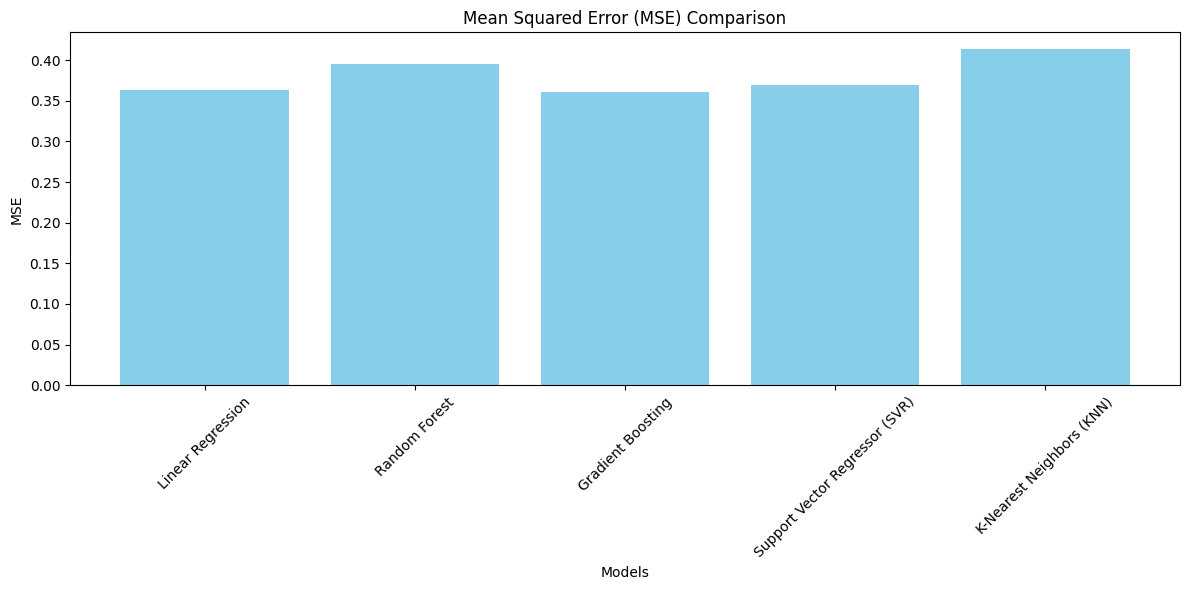

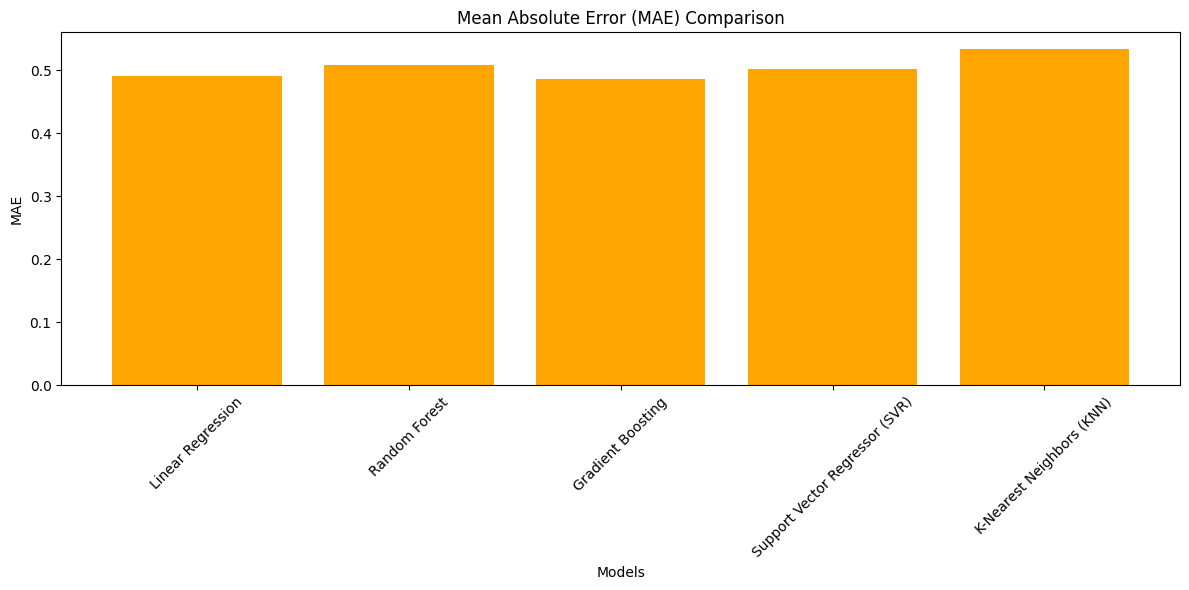

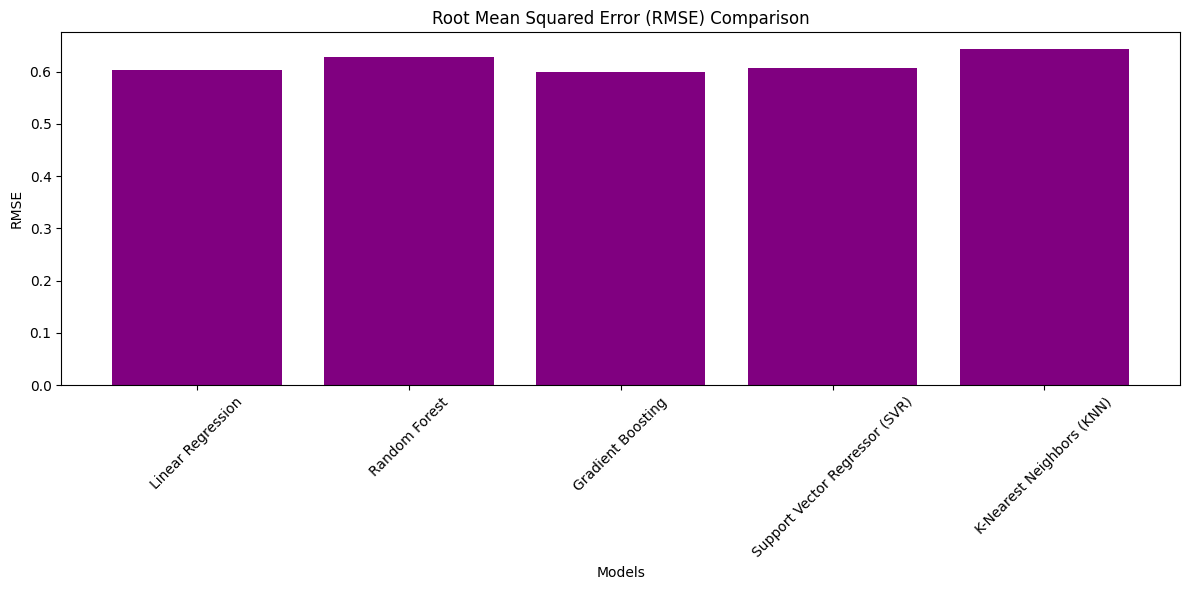

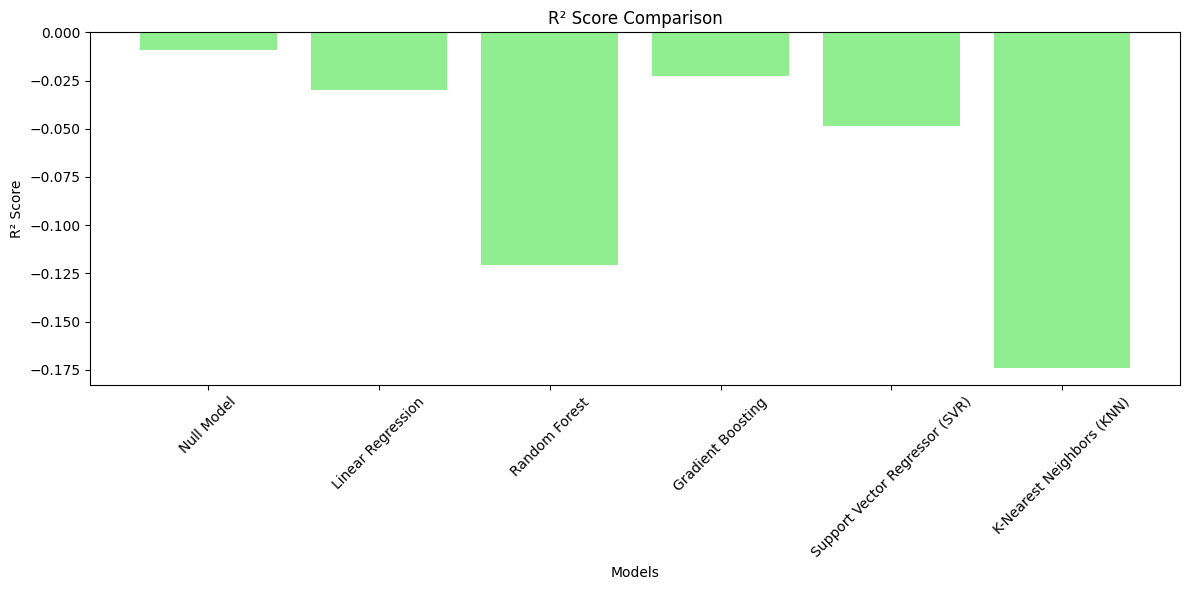

The best performing model is: Gradient Boosting


In [41]:
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [None, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [None, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Plot MSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mse_scores[1:], color='skyblue')
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mae_scores[1:], color='orange')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], rmse_scores[1:], color='purple')
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(12, 6))
plt.bar(models_names, r2_scores, color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify Best Model
best_model_name = models_names[np.argmax(r2_scores[1:]) + 1]  # Skip Null Model
print(f"The best performing model is: {best_model_name}")

### **Analysis and Comparison of Models (Random Forest, Gradient Boosting, SVR, KNN) Performance**

#### **Performance of the Models**:
Here’s a quick overview of the models based on the provided metrics:

1. **Random Forest**:
   - **MSE = 0.3946, MAE = 0.5081, RMSE = 0.6282, R² = -0.1208**
     - The model performs poorly, with a **negative R²**, indicating that the model’s predictions are worse than predicting the mean value of the target variable (Mental Health Index).
   
2. **Gradient Boosting**:
   - **MSE = 0.3601, MAE = 0.4860, RMSE = 0.6001, R² = -0.0229**
     - Though it performs slightly better than Random Forest, the negative **R²** still shows that the model is not capturing useful patterns from the data.
   
3. **Support Vector Regressor (SVR)**:
   - **MSE = 0.3692, MAE = 0.5019, RMSE = 0.6076, R² = -0.0487**
     - The performance is similar to Gradient Boosting and Random Forest, with a negative **R²**.
   
4. **K-Nearest Neighbors (KNN)**:
   - **MSE = 0.4134, MAE = 0.5332, RMSE = 0.6430, R² = -0.1743**
     - This model shows the worst performance, with the highest MSE and RMSE values, and a very negative **R²**.

#### **Key Observations**:
- All of these models (Random Forest, Gradient Boosting, SVR, and KNN) perform poorly compared to the **Null Model**, with negative **R²** scores. This indicates that they are failing to capture meaningful patterns in the data.
- **Negative R²** for all models suggests that the data might be too noisy, or the models are too complex for the problem at hand. Essentially, they are underfitting or not finding any useful relationships in the dataset.

### **Cause of the Issue: Data Problems**
- The fact that all advanced models (like **Random Forest**, **Gradient Boosting**, **SVR**, and **KNN**) are performing poorly suggests **underlying issues in the data**. Specifically:
  - **No strong patterns or relationships**: The models are unable to identify any meaningful relationships between the independent variables and the target variable (**Mental Health Index - MHI**).
  - **Possibly irrelevant or noisy features**: The dataset might contain features that are unrelated or poorly related to the target variable, leading the models to perform poorly.

### **Proposed Solution: Feature Selection Based on Correlation Analysis**
To improve the performance of the models. By filtering out irrelevant features and focusing on those that have a strong correlation with the target variable (**Mental Health Index**), we can potentially improve model performance.


#### **Solution - Correlation Analysis**:
- **Removes irrelevant features**: By selecting only those features that are highly correlated with **MHI**, we ensure that the models are trained only on the most relevant data.
- **Reduces noise**: This approach reduces the noise in the data, improving the signal-to-noise ratio and potentially leading to better model performance.
- **Improves generalization**: By removing weakly correlated features, we reduce the risk of overfitting, and the model can generalize better to unseen data.

Here is the code snippet for filtering features based on correlation analysis:

In [42]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data_path = "EncodedPrimaryData.csv"
data = pd.read_csv(data_path)

# Define columns for individual indices
columns_mapping = {
    "Self-Esteem": [
        "Does the number of likes or comments you get on your posts affect you?",
        "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
        "Do you prefer interacting with friends or family online rather than face-to-face?"
    ],
    "Social Anxiety": [
        "Do you feel anxious or stressed after reading negative comments on your posts?",
        "Are you worried about missing out on important information or events when you're not using social media?"
    ],
    "Insomnia": [
        "Do you use social media right before going to sleep?",
        "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"
    ],
    "FOMO": [
        "How often do you find yourself using social media for longer than you planned?"
    ],
    "Attention Span": [
        "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
        "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
    ]
}

# Define weights for MHI calculation
weights = {
    "Self-Esteem": 0.35,
    "Social Anxiety": 0.25,
    "Insomnia": 0.20,
    "FOMO": 0.15,
    "Attention Span": 0.05
}

# Calculate individual indices and MHI
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)

# Filter features with high correlation
correlation_threshold = 0.5  # Set correlation threshold
correlation_matrix = data.corr()
high_corr_features = correlation_matrix["Mental Health Index (MHI)"].abs() > correlation_threshold
selected_columns = correlation_matrix[high_corr_features].index.tolist()

# Filter the dataset to include only selected columns
filtered_data = data[selected_columns]

# Separate independent and dependent variables
dependent_variable = "Mental Health Index (MHI)"
independent_columns = [col for col in filtered_data.columns if col != dependent_variable]

independent_data = filtered_data[independent_columns]
dependent_data = filtered_data[dependent_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Null Model:

In [43]:
# Null Model Calculation
null_pred = np.full_like(y_test, y_train.mean())  # Predict the mean value for all test data
null_mse = mean_squared_error(y_test, null_pred)
null_mae = mean_absolute_error(y_test, null_pred)
null_rmse = np.sqrt(null_mse)
null_r2 = r2_score(y_test, null_pred)

# Display Null Model Results
null_results = pd.DataFrame({
    "MSE": [null_mse],
    "MAE": [null_mae],
    "RMSE": [null_rmse],
    "R2": [null_r2]
}, index=["Null Model"])
print("Null Model Performance:")
print(null_results)



Null Model Performance:
                 MSE       MAE      RMSE        R2
Null Model  0.455969  0.562101  0.675255 -0.010159


### 6. Baseline Model (Linear Regression)

In [44]:
# Linear Regression Calculation
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

# Display Linear Regression Results
linear_results = pd.DataFrame({
    "MSE": [linear_mse],
    "MAE": [linear_mae],
    "RMSE": [linear_rmse],
    "R2": [linear_r2]
}, index=["Linear Regression"])
print("Linear Regression Performance:")
print(linear_results)

Linear Regression Performance:
                        MSE       MAE      RMSE        R2
Linear Regression  0.014992  0.097863  0.122441  0.966787


### **Analysis and Comparison of Null Model and Baseline Model (Linear Regression)**

#### **1. Null Model Performance**:
- **MSE = 0.455969**: The Null Model, which predicts the mean value for all test cases, has a relatively high MSE. 
- **MAE = 0.562101**: The MAE shows that the average error in predictions is 0.5621. This is also relatively high and reflects the basic approach of the Null Model.
- **RMSE = 0.675255**: The RMSE of 0.675255 further confirms that the Null Model performs poorly, with significant errors in its predictions.
- **R² = -0.010159**: A negative R² value indicates that the Null Model is performing worse than just predicting the mean value for the target variable. This is expected for a simple model with no learning or correlation.

#### **2. Linear Regression Performance (After Applying Correlation Analysis)**:
- **MSE = 0.014992**: After applying **correlation analysis** and selecting the relevant features, the Linear Regression model has an extremely low MSE of 0.014992. This represents a significant improvement over the Null Model, showing that the Linear Regression model is learning from the data effectively after filtering out irrelevant features.
- **MAE = 0.097863**: The MAE of 0.097863 is much lower than the Null Model’s MAE of 0.5621. This indicates that the Linear Regression model is making much more accurate predictions.
- **RMSE = 0.122441**: The RMSE of 0.122441 shows that the model’s error is significantly reduced after feature selection. This indicates that Linear Regression is now providing more reliable predictions compared to the Null Model.
- **R² = 0.966787**: The **R²** score of 0.966787 means that the Linear Regression model explains about **96.68%** of the variance in the target variable. This is a huge improvement compared to the negative **R²** of the Null Model, showing that the Linear Regression model is now capturing useful patterns in the data.


### **Conclusion**:
- **Linear Regression** has shown an excellent improvement in performance after applying the correlation analysis solution. It now significantly outperforms the **Null Model** across all metrics.
- This highlights the importance of **feature selection** and **data preprocessing** in improving model performance.
- **Correlation analysis** was a key step in identifying the most relevant features, enabling the model to learn better from the data.


In [45]:

# Calculate other models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

other_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    other_results[model_name] = {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}

# Display other models' results
other_results_df = pd.DataFrame(other_results).T
print("Other Models Performance:")
print(other_results_df)

# Save all results to separate CSV files
null_results.to_csv("null_model_performance.csv")
linear_results.to_csv("linear_regression_performance.csv")
other_results_df.to_csv("other_models_performance.csv")

Other Models Performance:
                                     MSE       MAE      RMSE        R2
Random Forest                   0.023231  0.120954  0.152417  0.948534
Gradient Boosting               0.019186  0.108009  0.138512  0.957496
Support Vector Regressor (SVR)  0.018741  0.108309  0.136898  0.958481


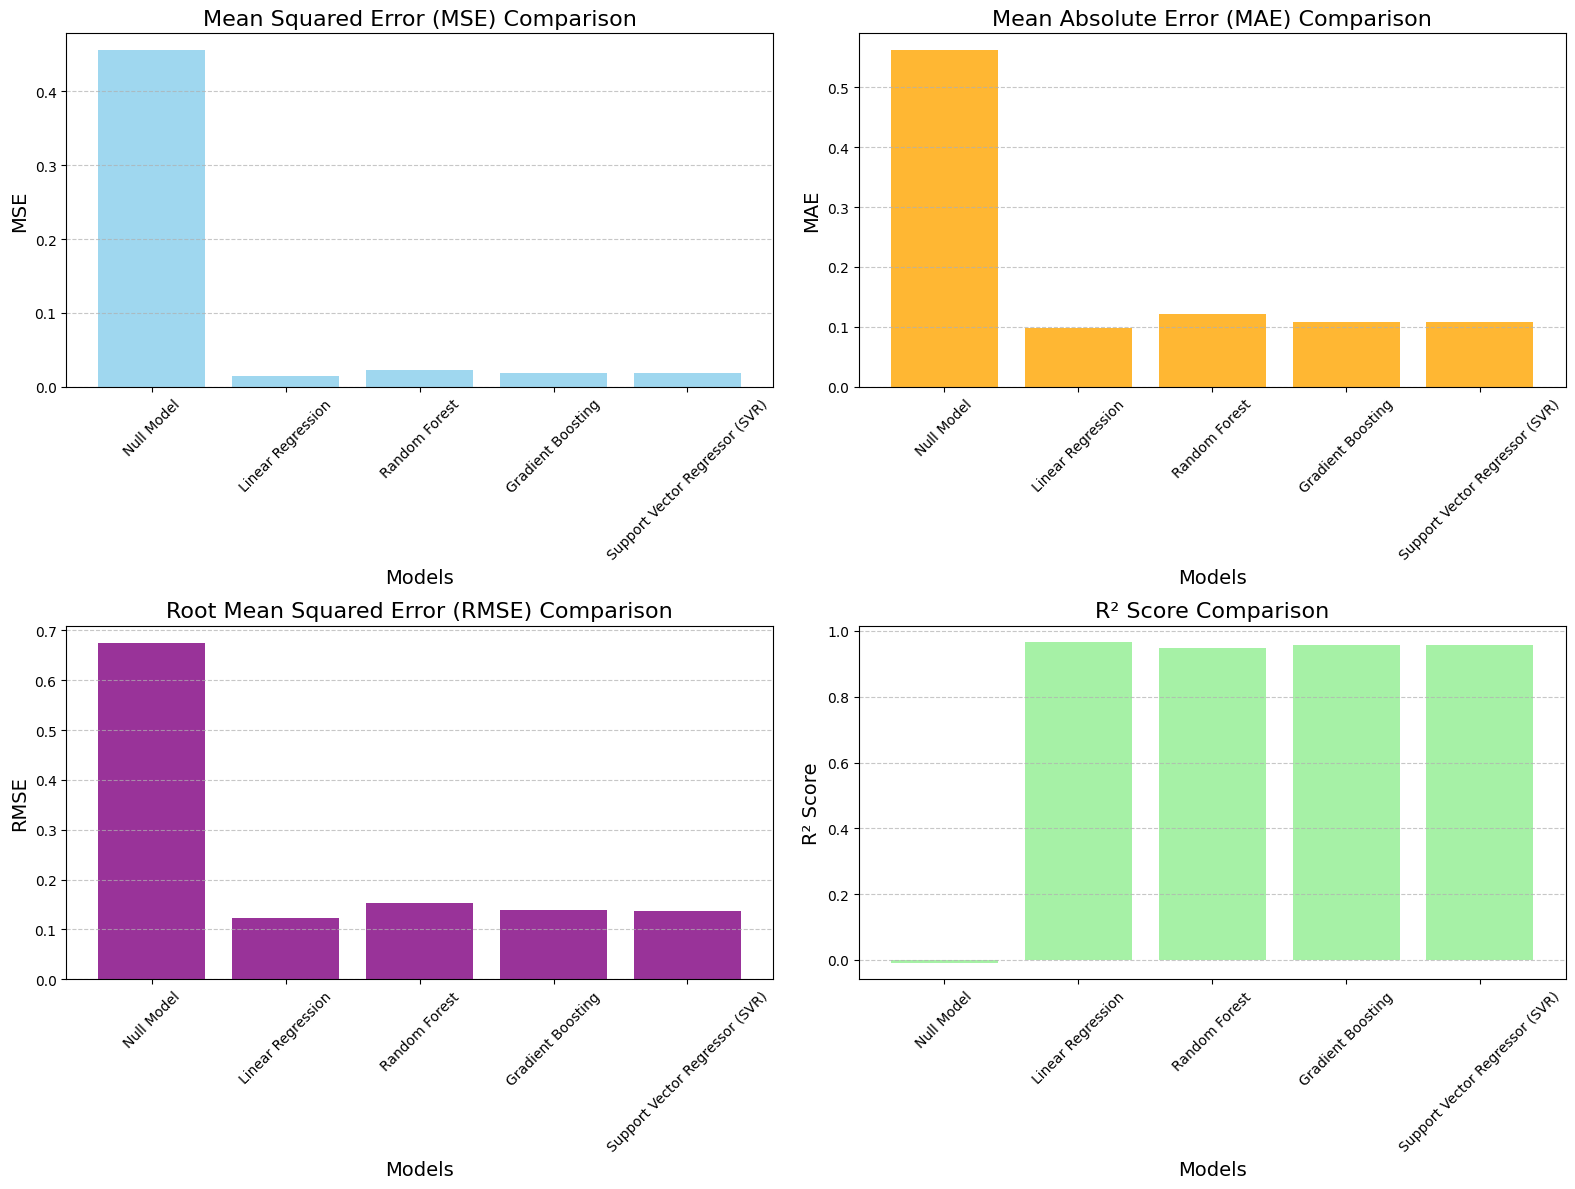

The best performing model based on R² is: Linear Regression


In [46]:
import matplotlib.pyplot as plt
import numpy as np

performance_results = {
    "Random Forest": [0.023231, 0.120954, 0.152417, 0.948534],  # [MSE, MAE, RMSE, R2]
    "Gradient Boosting": [0.019186, 0.108009, 0.138512, 0.957496],
    "Support Vector Regressor (SVR)": [0.018741, 0.108309, 0.136898, 0.958481]
}

# Null Model and Linear Regression performance values
mse_null, mae_null, rmse_null, r2_null = 0.455969, 0.562101, 0.675255, -0.010159
mse_linear, mae_linear, rmse_linear, r2_linear = 0.014992, 0.097863, 0.122441, 0.966787

# Data for models and metrics
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [mae_null, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [rmse_null, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot MSE
axs[0, 0].bar(models_names, mse_scores, color='skyblue', alpha=0.8)
axs[0, 0].set_title("Mean Squared Error (MSE) Comparison", fontsize=16)
axs[0, 0].set_ylabel("MSE", fontsize=14)
axs[0, 0].set_xlabel("Models", fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot MAE
axs[0, 1].bar(models_names, mae_scores, color='orange', alpha=0.8)
axs[0, 1].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16)
axs[0, 1].set_ylabel("MAE", fontsize=14)
axs[0, 1].set_xlabel("Models", fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot RMSE
axs[1, 0].bar(models_names, rmse_scores, color='purple', alpha=0.8)
axs[1, 0].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16)
axs[1, 0].set_ylabel("RMSE", fontsize=14)
axs[1, 0].set_xlabel("Models", fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot R²
axs[1, 1].bar(models_names, r2_scores, color='lightgreen', alpha=0.8)
axs[1, 1].set_title("R² Score Comparison", fontsize=16)
axs[1, 1].set_ylabel("R² Score", fontsize=14)
axs[1, 1].set_xlabel("Models", fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

# Identify Best Model by R²
best_model_index = np.argmax(r2_scores[1:]) + 1  # Exclude Null Model
best_model_name = models_names[best_model_index]
print(f"The best performing model based on R² is: {best_model_name}")


### **Analysis and Comparison of Other Models**

#### **1. Baseline Model (Linear Regression) Performance**:
- **MSE = 0.014992, MAE = 0.097863, RMSE = 0.122441, R² = 0.966787**: The Linear Regression model performs very well with a high **R²** score, indicating it captures 96.68% of the variance in the data.

#### **2. Other Models**:

**Random Forest**:
- **MSE = 0.023231, MAE = 0.120954, RMSE = 0.152417, R² = 0.948534**: 
  - Random Forest performs well, but it has a **lower R²** than **Linear Regression** (94.85% vs. 96.68%).
  - The **MSE** and **RMSE** are higher, indicating slightly worse performance than the baseline.

**Gradient Boosting**:
- **MSE = 0.019186, MAE = 0.108009, RMSE = 0.138512, R² = 0.957496**:
  - Gradient Boosting shows better performance than Random Forest, with an **R²** of 95.75%, closer to the baseline model but still slightly lower than **Linear Regression**.
  - **MSE** and **RMSE** are lower than Random Forest, indicating it performs better overall.

**Support Vector Regressor (SVR)**:
- **MSE = 0.018741, MAE = 0.108309, RMSE = 0.136898, R² = 0.958481**:
  - SVR also shows good performance, with an **R²** of 95.85%, close to **Gradient Boosting**.
  - **MSE** and **RMSE** are similar to those of **Gradient Boosting** and better than **Random Forest**.


### **Key Insights**:

1. **Best Performing Model**:
   - **Linear Regression** still performs the best in terms of **R²**, capturing 96.68% of the variance. It has the lowest **MSE** and **RMSE** among the other models.
   
2. **Comparison of Other Models**:
   - **Gradient Boosting** and **SVR** are the next best models, with **R²** scores of **95.75%** and **95.85%** respectively, indicating that they perform nearly as well as Linear Regression but slightly worse in explaining the variance in the data.
   - **Random Forest** performs the weakest of the four, with an **R²** of **94.85%** and higher **MSE** and **RMSE**.

3. **Accuracy**:
   - **Linear Regression** provides the most accurate predictions overall based on **R²**, and it has the lowest error metrics (**MSE**, **MAE**, **RMSE**).
   - **Gradient Boosting** and **SVR** provide very similar performance, slightly worse than **Linear Regression**, while **Random Forest** has the worst performance among the models tested.

### **Conclusion**:
- **Linear Regression** remains the best model in this case based on the **R²** score, **MSE**, and **RMSE**.
- **Gradient Boosting** and **SVR** are strong alternatives, with **Gradient Boosting** being slightly better.
- **Random Forest** performs the weakest and is less accurate compared to the other models.

## References Supporting the Mental Health Index (MHI):

### **Self-Esteem**

1. **Brain Regions: Prefrontal Cortex (PFC) and Cingulate Cortex**
- **Source:** Eisenberger, N. I., & Cole, S. W. (2012). "Social neuroscience and health: Neurophysiological mechanisms linking social ties with physical health." *Nature Neuroscience*.
  - **Link:** [https://www.nature.com/articles/nn.3086](https://www.nature.com/articles/nn.3086)

2. **Cognitive Impacts of Low Self-Esteem**
   - **Source:** Orth, U., et al. (2012). "Self-esteem development from young adulthood to old age: A cohort-sequential longitudinal study." *Journal of Personality and Social Psychology*.
     - **Why Reliable?** Published by the American Psychological Association.
     - **Link:** [https://psycnet.apa.org/doi/10.1037/a0024299](https://psycnet.apa.org/doi/10.1037/a0024299)


### **Social Anxiety**

1. **Brain Regions: Amygdala and Insular Cortex**
   - **Source:** Etkin, A., & Wager, T. D. (2007). "Functional neuroimaging of anxiety: A meta-analysis of emotional processing in PTSD, social anxiety disorder, and specific phobia." *American Journal of Psychiatry*.
     - **Link:** [https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476](https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476)

2. **Impact on Mental Health**
- **Source:** Stein, M. B., et al. (2001). "Neurobiology of generalized anxiety disorder: A review." *CNS Spectrum*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


### **Insomnia**

1. **Brain Regions: Hypothalamus and Hippocampus**
- **Source:** Saper, C. B., et al. (2005). "The sleep switch: Hypothalamic control of sleep and wakefulness." *Trends in Neurosciences*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


2. **Mental Health Impacts of Sleep Deprivation**
- **Source:** Walker, M. P. (2008). "Cognitive consequences of sleep deprivation." *Sleep Medicine Clinics*.
  - **Link:** [https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.](https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.)


### **Fear of Missing Out (FOMO)**

1. **Brain Regions: Nucleus Accumbens and ACC**
   - **Source:** Meshi, D., et al. (2013). "Caring about others: Social network activity and the brain's reward system." *Journal of Cognitive Neuroscience*.
     - **Link:** [https://direct.mit.edu/jocn/article/25/1/42/27963](https://direct.mit.edu/jocn/article/25/1/42/27963)

2. **Behavioral Correlates of FOMO**
   - **Source:** Przybylski, A. K., et al. (2013). "Motivational, emotional, and behavioral correlates of fear of missing out." *Computers in Human Behavior*.
     - **Link:** [https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800](https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800)


### **Shorter Attention Span**

1. **Brain Regions: Prefrontal Cortex and Default Mode Network (DMN)**
   - **Source:** Raichle, M. E. (2015). "The brain's default mode network." *Annual Review of Neuroscience*.
     - **Link:** [https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030](https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030)

2. **Impact of Media Multitasking on Attention**
   - **Source:** Ophir, E., et al. (2009). "Cognitive control in media multitaskers." *Proceedings of the National Academy of Sciences (PNAS)*.
     - **Link:** [https://www.pnas.org/doi/10.1073/pnas.0903620106](https://www.pnas.org/doi/10.1073/pnas.0903620106)
